<a href="https://colab.research.google.com/github/kylianmbappe9/Python-Machine-Learning-End-To-End-Projects/blob/main/Harnessing_Quantum_Chemistry_Revolutionizing_Waste_to_Energy_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#making use of variational quantum deflation and variational quantum eigensolvers

-> the difference between the variational quantum deflation and variational quantum eigensolvers is that VQD focuses on optimizing the quantum system as a whole however, the VQE mostly focuses on optimizing the quantum system on a
ground state

#Identify the cost hgamiltonian function
Because the quantum model is harnessed in a superposition position, this allows multiple outputs to be retrieved as they can optimize both solutions simultaneously allowing more options to maximize energy while minimize our cost function





This is our first ground state cost function which outputs the initial energy  that has been retrieved

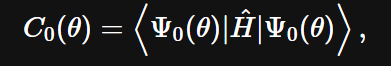

#our first excited state where Beta is the value between the first excited state [consider that as the second energy output] - the ground sate [consider that as the first energy output] and Beta should be maximsed so as to not get way too fast because our main is to get maximum power [AS IN GO DOWN THE HILL] and have minimum cost functoin [AND NOT GET INJURED ALONG THE WAY]

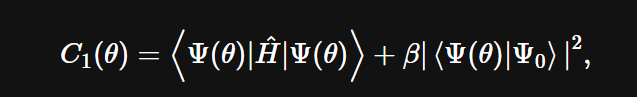

In [79]:
!pip install pennylane

this code identifies the molecular dynamics that play a role when it comes to optimizing the process which converts waste to energy by simulating different molecular structures. On top of that it yields multiple catalyst solutions but because of the cost hamiltonian, the quantum circuit inside rotates [Beacuse our distance which is the power output] yields a very high value but because of rotation, not only one will achieve a higher power but outputs a very low cost function, resulting ina  more efficient use of waste

In [80]:

import pennylane as qml
import numpy as np
import warnings

warnings.filterwarnings(action="ignore", category=np.ComplexWarning)

n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

H = qml.Hamiltonian(np.array([1.0]), [qml.PauliZ(0)])

def prepare_ground_state(wires):
    qml.BasisState(np.array([0, 0, 0, 0]), wires=wires)



In [81]:
@qml.qnode(dev)
def circuit():
    prepare_ground_state(range(n_qubits))
    return qml.expval(H)

fixed_charge = 10
variable_rate = 0.15
usage_hours_per_day = 24

energy = circuit()

power_output = energy * 100
kWh = (power_output * usage_hours_per_day) / 1000
total_cost = fixed_charge + (variable_rate * kWh)

print(f"Energy: {energy:.8f} Ha")
print(f"Power Output: {power_output:.8f} Watts")
print(f"Total Cost: {total_cost:.2f} USD")


Energy: 1.00000000 Ha
Power Output: 100.00000000 Watts
Total Cost: 10.36 USD


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

quantum_power_outputs = []
quantum_costs = []
classical_power_outputs = []
classical_costs = []

fixed_charge_quantum = 10
variable_rate_quantum = 0.15
fixed_charge_classical = 10
variable_rate_classical = 0.15



In [86]:
for i in range(35):
    power_output = desired_power_output + i

    kWh_quantum = power_output * usage_hours_per_day / 1000
    total_cost_quantum = fixed_charge_quantum + (variable_rate_quantum * kWh_quantum)

    quantum_power_outputs.append(power_output)
    quantum_costs.append(total_cost_quantum)

    power_output_classical = power_output + i
    kWh_classical = power_output_classical * usage_hours_per_day / 1000
    total_cost_classical = (fixed_charge_classical + (variable_rate_classical * kWh_classical))
    classical_power_outputs.append(power_output_classical)
    classical_costs.append(total_cost_classical)



In [84]:
quantum_df = pd.DataFrame({
    'Power Output (Watts)': quantum_power_outputs,
    'Total Cost (USD)': quantum_costs
})

classical_df = pd.DataFrame({
    'Power Output (Watts)': classical_power_outputs,
    'Total Cost (USD)': classical_costs
})


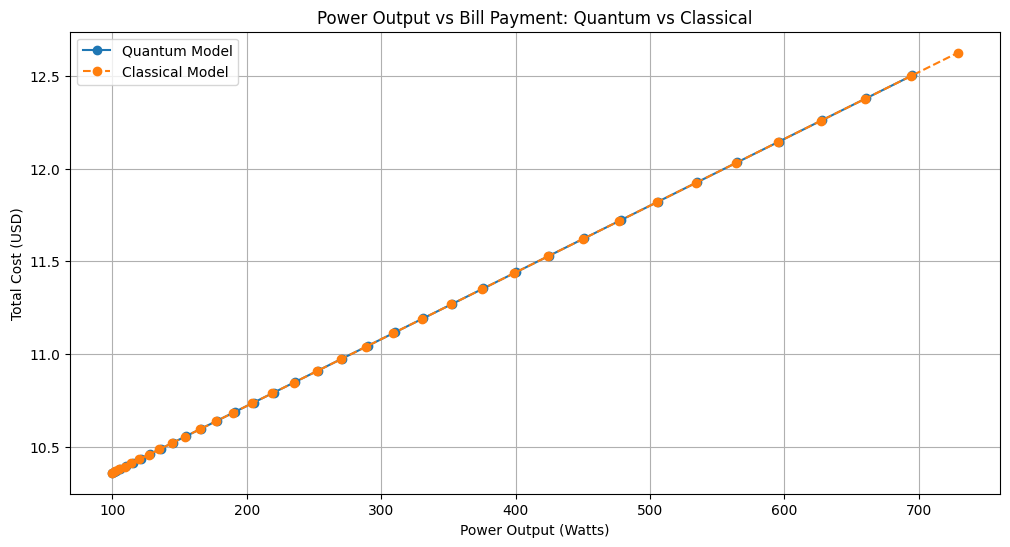

Quantum Model Results:
   Power Output (Watts)    Total Cost (USD)
0                 100.0               10.36
1                 101.0             10.3636
2                 103.0             10.3708
3                 106.0             10.3816
4                 110.0              10.396
5                 115.0              10.414
6                 121.0             10.4356
7                 128.0             10.4608
8                 136.0             10.4896
9                 145.0              10.522
10                155.0              10.558
11                166.0             10.5976
12                178.0             10.6408
13                191.0             10.6876
14                205.0              10.738
15                220.0              10.792
16                236.0             10.8496
17                253.0             10.9108
18                271.0             10.9756
19                290.0              11.044
20                310.0              11.116
21       

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(quantum_df['Power Output (Watts)'], quantum_df['Total Cost (USD)'], marker='o', label='Quantum Model')
plt.plot(classical_df['Power Output (Watts)'], classical_df['Total Cost (USD)'], marker='o', label='Classical Model', linestyle='--')
plt.title('Power Output vs Bill Payment: Quantum vs Classical')
plt.xlabel('Power Output (Watts)')
plt.ylabel('Total Cost (USD)')
plt.grid()
plt.legend()
plt.show()

print("Quantum Model Results:")
print(quantum_df)
print("\nClassical Model Results:")
print(classical_df)

